# Applied Statistics for Machine Learning

# A. Probablity Fundamentals

Machine learning is full of unceertainty --- noisy labels, incomplete features, shifting behavior, rare-but-important events. Probability is the language we use to talk about that uncertainty clearly.  

This section will cover probability in a way that transfers: not as symbol-pushing, but as a toolkit for reasoning about data-generating processes and decisions under uncertainty. 

## A.1 Random variables: turning stories into measurable uncertainty

A random variable is not "random numbers", it is a rule that maps outcomes to numbers.  

**What is a random variable, really?**  
Think data-generating process. There is a world state, and an observation we record. A random variable is the object that represents the value we might observe.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Scenario</th>
            <th>Outcome space</th>
            <th>Random variable (numeric)</th>
            <th>What ML cares bout</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Coin flip</td>
            <td>{H,T}</td>
            <td>X = 1(H), 0(T)</td>
            <td>Bernoulli features, uncertainty</td>
        </tr>
        <tr>
            <td>Support ticket</td>
            <td>Many possible tickets</td>
            <td>T = resolution time (hours)</td>
            <td>Tail risk, SLAs, forecasting</td>
        </tr>
        <tr>
            <td>NYC 311 request</td>
            <td>All possible requests</td>
            <td>Y = "resolved within 24h" (0/1)</td>
            <td>Classification target</td>
        </tr>
    </tbody>
</table>

**KEY HABIT:**  
Always ask: What is the outcome space, and how am I mapping it to a number?

<table style="text-align:left;">
    <caption style="font-weight:bold;">Two Flavors: Discrete and Continuous</caption>
    <thead>
        <tr>
            <th>Type</th>
            <th>Examples</th>
            <th>Probability object</th>
            <th>Common pitfall</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Discrete</td>
            <td>Counts, categories mapped to numbers, 0/1 labels</td>
            <td>PMF: P(X=x)</td>
            <td>Forgetting probabilities must sum to 1</td>
        </tr>
        <tr>
            <td>Continuous</td>
            <td>Time, weight, temperature</td>
            <td>PDF: f(x) (area=probability)</td>
            <td>Thinking P(X = exact value) > 0</td>
        </tr>
    </tbody>
</table>

### Microlab: Random variables from simulation  

Simulate a dice-based random variable, estimate its PMF, and compute E[X] and Var(X)  
* **PMF:** Probability Mass Function (P(X=x).
    Gives all possible values the variable can take and the probability of each value

* **E[X]:** Expected Value (mean).
    Long run average of the random variable  
    $E[X] = \sum_x x \cdot P(X=x)$

* **Var(X):** Variance
    How spread out the values are around the mean  
    $Var(X) = E[X^2] - (E[X])^2$

Empirical PMF (approx):
0    0.83512
1    0.16488
Name: proportion, dtype: float64

E[X] ~ 0.16488
Var(X) ~ 0.1376945856


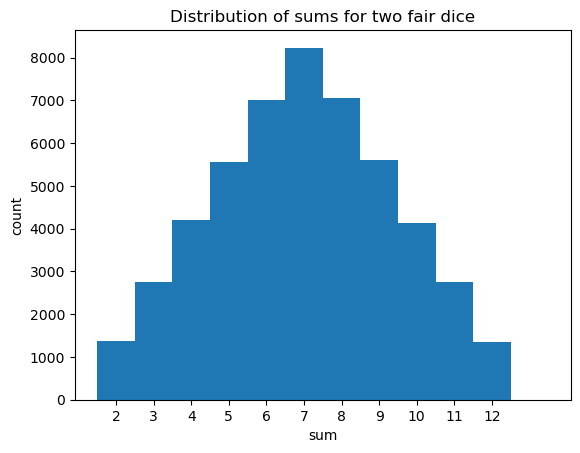

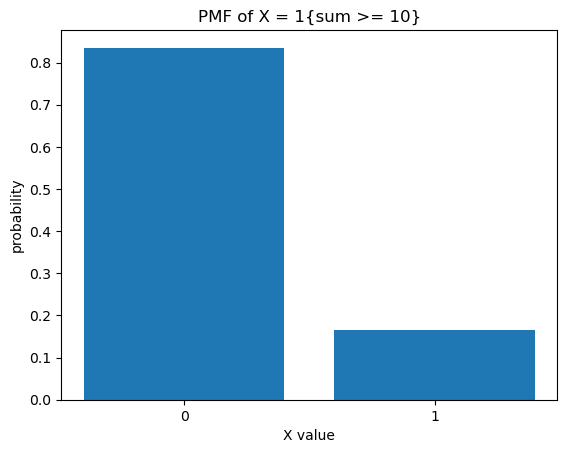


Key ideas:
1) A random variable is a mapping from outcomes (dice rolls) to numbers (0/1).
2) The PMF describes the distribution of that numeric variable.
3) E[X] is a long-run average; Var(X) captures typical fluctuation around that average.

Try:
- Redefine X as: X = sum (not an indicator). Recompute E[X] and Var(X).
- Change the rule to sum >= 11. How does E[X] change?
- Make one die 'loaded' by sampling from a custom distribution and see what breaks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

# Define a random variable:
# Roll two dice. X = 1 if sum >= 10 else 0 (a "success" indicator).
n = 50_000
d1 = rng.integers(1, 7, size=n)
d2 = rng.integers(1, 7, size=n)
s = d1 + d2
X = (s >= 10).astype(int)

pmf = pd.Series(X).value_counts(normalize=True).sort_index()
print("Empirical PMF (approx):")
print(pmf)

EX = float(np.mean(X))
VarX = float(np.var(X, ddof=0))   # population variance for the simulated distribution
print("\nE[X] ~", EX)
print("Var(X) ~", VarX)

# Visualize the underlying process: distribution of sums
plt.figure()
plt.hist(s, bins=np.arange(2, 14+1) - 0.5)
plt.xticks(range(2, 13))
plt.title("Distribution of sums for two fair dice")
plt.xlabel("sum")
plt.ylabel("count")
plt.show()

# Visualize the random variable outcomes (0/1)
plt.figure()
plt.bar(pmf.index.astype(str), pmf.values)
plt.title("PMF of X = 1{sum >= 10}")
plt.xlabel("X value")
plt.ylabel("probability")
plt.show()

print("\nKey ideas:")
print("1) A random variable is a mapping from outcomes (dice rolls) to numbers (0/1).")
print("2) The PMF describes the distribution of that numeric variable.")
print("3) E[X] is a long-run average; Var(X) captures typical fluctuation around that average.")

print("\nTry:")
print("- Redefine X as: X = sum (not an indicator). Recompute E[X] and Var(X).")
print("- Change the rule to sum >= 11. How does E[X] change?")
print("- Make one die 'loaded' by sampling from a custom distribution and see what breaks.")

## A.2 Conditional probability: Updating beliefs with context

Conditional is how you say "Given what I know, what is still uncertain?"  

**What conditional probability mean:** 
Conditional probability answers a refined question: instead of $P(A)$ you ask $P(A | B)$; the probability of A among gases where B is true.  

**Definition**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**Most common mistake**  
Confusing $P(A|B)$ with $P(B|A)$. They can be very different

**Contingency Tables**  
In tabular data, conditional probability is often just "counts with a filter". A contingency table makes the denominator explicit.

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Question</th>
            <th>In words</th>
            <th>In data terms</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P(Delayed)</td>
            <td>How often delayed overall?</td>
            <td>fraction of rows delayed</td>
        </tr>
        <tr>
            <td>P(Delayed | Agency=DOT)</td>
            <td>How often delayed among DOT cases?</td>
            <td>filter agency=DOT, then fraction delayed</td>
        </tr>
        <tr>
            <td>P(Agency=DONT | Delayed)</td>
            <td>Among delayed cases, how often DOT?</td>
            <td>filter delayed, then fraction DOT</td>
        </tr>
    </tbody>
    
</table>

### Microlab: Conditional probability with base rates  

Generate a synthetic dataset with a rare event and compute conditional probabilities. The goal is denominator discipline: always know what population you are conditioning on.  

In [2]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(10)
n = 50_000

# Scenario: "Fraud" is rare. "Flag" is a noisy detector.
# Base rate: P(Fraud)=1%
fraud = rng.random(n) < 0.01

# Detector quality:
# P(Flag | Fraud) = 0.90 (sensitivity)
# P(Flag | not Fraud) = 0.05 (false positive rate)
flag = np.where(fraud, rng.random(n) < 0.90, rng.random(n) < 0.05)

df = pd.DataFrame({"fraud": fraud, "flag": flag})

# Contingency table
ct = pd.crosstab(df["fraud"], df["flag"], rownames=["fraud"], colnames=["flag"])
print("Contingency table (counts):")
print(ct)

# Probabilities
P_fraud = df["fraud"].mean()
P_flag = df["flag"].mean()

P_flag_given_fraud = df.loc[df["fraud"], "flag"].mean()
P_fraud_given_flag = df.loc[df["flag"], "fraud"].mean()

print("\nKey probabilities:")
print("P(Fraud) =", float(P_fraud))
print("P(Flag)  =", float(P_flag))
print("P(Flag | Fraud) =", float(P_flag_given_fraud))
print("P(Fraud | Flag) =", float(P_fraud_given_flag))

print("\nInterpretation:")
print("- P(Flag | Fraud) asks: among truly fraudulent, how often do we flag?")
print("- P(Fraud | Flag) asks: among flagged cases, how often is it truly fraud?")
print("  These differ because fraud is rare (base rate is small).")

print("\nTry:")
print("- Change base rate to 10% (replace 0.01 with 0.10). What happens to P(Fraud | Flag)?")
print("- Improve false positive rate from 5% to 1%. Does that help more than increasing sensitivity?")
print("- Add a second signal and compute P(Fraud | Flag AND Signal).")

Contingency table (counts):
flag   False  True 
fraud              
False  46953   2538
True      54    455

Key probabilities:
P(Fraud) = 0.01018
P(Flag)  = 0.05986
P(Flag | Fraud) = 0.8939096267190569
P(Fraud | Flag) = 0.1520213832275309

Interpretation:
- P(Flag | Fraud) asks: among truly fraudulent, how often do we flag?
- P(Fraud | Flag) asks: among flagged cases, how often is it truly fraud?
  These differ because fraud is rare (base rate is small).

Try:
- Change base rate to 10% (replace 0.01 with 0.10). What happens to P(Fraud | Flag)?
- Improve false positive rate from 5% to 1%. Does that help more than increasing sensitivity?
- Add a second signal and compute P(Fraud | Flag AND Signal).


## A.3 Bayes' theorem: priors, evidence, and base rates  
Bayes is bookkeeping for belief updates.  

**The idea**  
Bayes' theorem relates two conditional probabilities and forces you to include the base rate (**prior**). In practice, Bayes answers: "Given this evidence, how should my belief change?"  

**Bayes theorem:**  
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$  

<table style="text-align:left;">
    <caption style="font-weight:bold;">What each term means</caption>
    <thead>
        <tr>
            <th>Term</th>
            <th>Name</th>
            <th>Interpretation</th>
            <th>Common failure mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P(A)</td>
            <td>Prior</td>
            <td>Belief before new evidence</td>
            <td>Ignoring base rates</td>
        </tr>
        <tr>
            <td>P(B|A)</td>
            <td>Likelihood</td>
            <td>How compatible evidence is with A</td>
            <td>Overstating evidence strength</td>
        </tr>
        <tr>
            <td>P(A|B)</td>
            <td>Posterior</td>
            <td>Belief after seeing evidence</td>
            <td>Confusing with likelihood</td>
        </tr>
        <tr>
            <td>P(B)</td>
            <td>Evidence</td>
            <td>How common the evidence is overall</td>
            <td>Forgetting it depends on the whole population</td>
        </tr>
    </tbody>
</table>  

**Base rate neglect**  
If the prior is tiny, even good evidence may not make the posterior large. This shows up constantly in anomaly detection, fraud detection, and rare-event classification.  


### Microlab: Bayes update across different base rates  

Same test, same sensitivity, same false positive rate, only the base rate changes. The posterior can swing dramatically.  

Should notice that the test quality and class imbalance are inseparable. This is the heart of why accuracy can be a misleading metric in ML.  



Assumptions:
  Sensitivity P(Pos|A) = 0.9
  False positive rate P(Pos|~A) = 0.05

Posterior P(A|Pos) by prior:
  Prior P(A)= 0.001  ->  Posterior P(A|Pos)= 0.018
  Prior P(A)= 0.010  ->  Posterior P(A|Pos)= 0.154
  Prior P(A)= 0.050  ->  Posterior P(A|Pos)= 0.486
  Prior P(A)= 0.100  ->  Posterior P(A|Pos)= 0.667
  Prior P(A)= 0.250  ->  Posterior P(A|Pos)= 0.857
  Prior P(A)= 0.500  ->  Posterior P(A|Pos)= 0.947


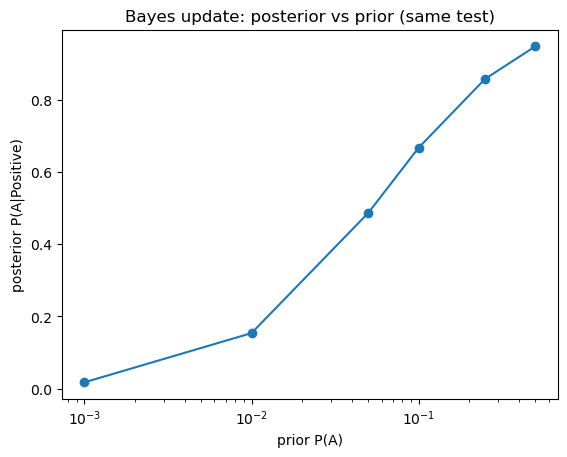


Key ideas:
1) Bayes is belief-updating: prior + evidence -> posterior.
2) When A is rare, false positives can dominate the positives.
3) Class imbalance is a probability problem, not just a modeling problem.

Try:
- Cut false positive rate from 0.05 to 0.01. Does posterior improve more than increasing sensitivity?
- Make sensitivity 0.70 and FPR 0.01. Which matters more depends on the prior.
- Replace x-axis log scale with linear to see why log is helpful for rare events.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

# Test characteristics (fixed)
sensitivity = 0.90          # P(Positive | A)
false_positive_rate = 0.05  # P(Positive | not A)

priors = np.array([0.001, 0.01, 0.05, 0.10, 0.25, 0.50])  # P(A)

def posterior(prior):
    # P(Pos) = P(Pos|A)P(A) + P(Pos|~A)P(~A)
    p_pos = sensitivity * prior + false_positive_rate * (1 - prior)
    return (sensitivity * prior) / p_pos

post = np.array([posterior(p) for p in priors])

print("Assumptions:")
print("  Sensitivity P(Pos|A) =", sensitivity)
print("  False positive rate P(Pos|~A) =", false_positive_rate)

print("\nPosterior P(A|Pos) by prior:")
for p, q in zip(priors, post):
    print(f"  Prior P(A)={p:>6.3f}  ->  Posterior P(A|Pos)={q:>6.3f}")

plt.figure()
plt.plot(priors, post, marker="o")
plt.title("Bayes update: posterior vs prior (same test)")
plt.xlabel("prior P(A)")
plt.ylabel("posterior P(A|Positive)")
plt.xscale("log")
plt.show()

print("\nKey ideas:")
print("1) Bayes is belief-updating: prior + evidence -> posterior.")
print("2) When A is rare, false positives can dominate the positives.")
print("3) Class imbalance is a probability problem, not just a modeling problem.")

print("\nTry:")
print("- Cut false positive rate from 0.05 to 0.01. Does posterior improve more than increasing sensitivity?")
print("- Make sensitivity 0.70 and FPR 0.01. Which matters more depends on the prior.")
print("- Replace x-axis log scale with linear to see why log is helpful for rare events.")

## A.4 Lab exercise with NYC311 - in lab notebook

# B. Common Distributions

Distributions are the "shapes" of randomness. In applied ML, they are also something more important: a distribution is a compact model you choose to represent a messy process.  

This section focuses on three workhorse distributions, and more importantly, on what to do when their assumptions fail:  
* binomial
* Poisson
* normal



## B.1 A distribution is a model, not a fact

Choosing a distribution is chosing a story about the data-generating process.  

<table stye="text-align:left;">
    <caption style="font-weight:bold;">What a distribution gives you</caption>
    <thead>
        <tr>
            <th>Why we use distributions</th>
            <th>What can go wrong</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Make uncertainty computable (rates, intervals, tail rist)</td>
            <td>Assumptions do not match reality</td>
        </tr>
        <tr>
            <td>Support simulation and decision thresholds</td>
            <td>Rare events / heavy tails dominate</td>
        </tr>
        <tr>
            <td>Provide baseline models ("null" expectations)</td>
            <td>Non-stationary and hidden mixtures</td>
        </tr>
    </tbody>
</table>

<table stye="text-align:left;">
    <caption style="font-weight:bold;">Assumption Checklist</caption>
    <thead>
        <tr>
            <th>Assumption Type</th>
            <th>Question to Ask</th>
            <th>Typical Failure Mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Independence</td>
            <td>Are observations coupled in time/space</td>
            <td>Bursts, autocorrelation</td>
        </tr>
        <tr>
            <td>Identical conditions</td>
            <td>Is the rate/variance stable across groups</td>
            <td>Mixtures (two processes) masquerading as one</td>
        </tr>
        <tr>
            <td>Measurement</td>
            <td>Is the thing we count actually counted correctly</td>
            <td>Missingness, censoring, truncation</td>
        </tr>
    </tbody>
</table>

**Note:**  
Before you fit a distribution, write a sentence:  

*"I am using distribution X because the process looks like ____."*

Then try to falsify the sentence.

### Microlab: Same mean, different distribution  

Generate three datasets that share a similar mean, but differ in shape and tail behavior: binomial-like, Poisson-like, and normal-like.  

The point: mean alone does not identify the distribution


Binomial(20, 0.5):
  mean: 10.00198
  std: 2.23865948985714
  min/max: 2.0 19.0

Poisson(10):
  mean: 9.9781
  std: 3.1522149544700824
  min/max: 0.0 26.0

Normal(10, 3):
  mean: 10.006322319327872
  std: 2.997940853458997
  min/max: -2.6377513564508543 21.56617266119155


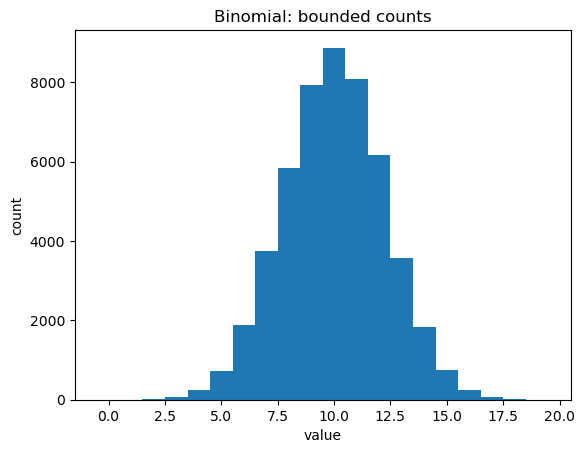

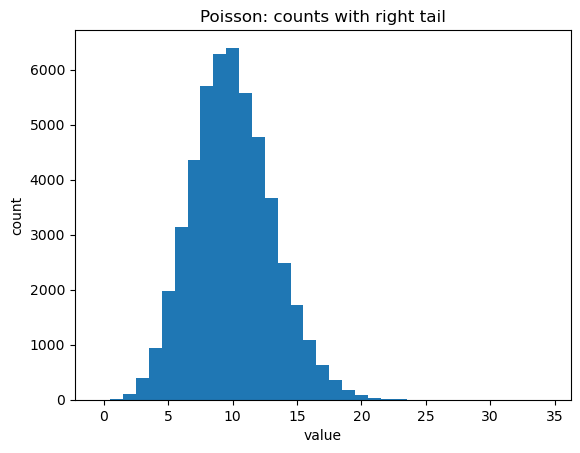

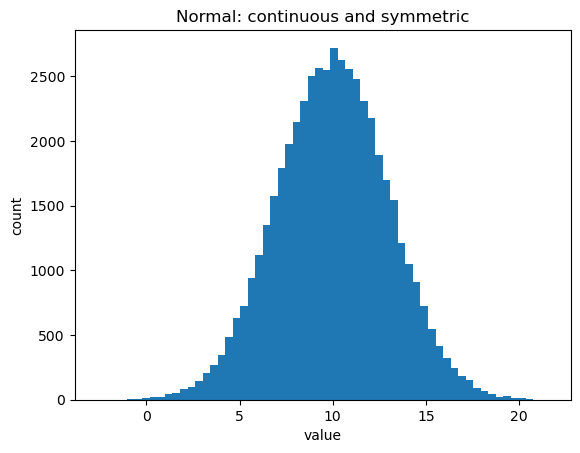


Key ideas:
1) Similar means can hide very different shapes and constraints.
2) Distribution choice encodes assumptions (boundedness, discreteness, tail behavior).
3) In applied work, shape + assumptions matter more than “perfect fit.”

Try:
- Increase Poisson lambda to 30. What changes about relative variability?
- Change binomial to (n=100, p=0.1). Same mean (~10), different variance and support.
- Clip the normal at 0 (no negative counts). What does that do to the shape?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(0)
n = 50_000

# Roughly similar means ~10
x_binom = rng.binomial(n=20, p=0.5, size=n)        # mean=10, bounded [0,20]
x_pois  = rng.poisson(lam=10, size=n)              # mean=10, counts with right tail
x_norm  = rng.normal(loc=10, scale=3, size=n)      # mean=10, continuous, symmetric

def summarize(x, name):
    x = pd.Series(x)
    print(f"\n{name}:")
    print("  mean:", float(x.mean()))
    print("  std:", float(x.std(ddof=1)))
    print("  min/max:", float(x.min()), float(x.max()))

summarize(x_binom, "Binomial(20, 0.5)")
summarize(x_pois, "Poisson(10)")
summarize(x_norm, "Normal(10, 3)")

plt.figure()
plt.hist(x_binom, bins=np.arange(-0.5, 20.5, 1))
plt.title("Binomial: bounded counts")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(x_pois, bins=np.arange(-0.5, 35.5, 1))
plt.title("Poisson: counts with right tail")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(x_norm, bins=60)
plt.title("Normal: continuous and symmetric")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

print("\nKey ideas:")
print("1) Similar means can hide very different shapes and constraints.")
print("2) Distribution choice encodes assumptions (boundedness, discreteness, tail behavior).")
print("3) In applied work, shape + assumptions matter more than “perfect fit.”")

print("\nTry:")
print("- Increase Poisson lambda to 30. What changes about relative variability?")
print("- Change binomial to (n=100, p=0.1). Same mean (~10), different variance and support.")
print("- Clip the normal at 0 (no negative counts). What does that do to the shape?")

## B.2 Binomial: counts of successes in N trials

Use binomial when you have a fixed number of trials and each trial is a success/failure  

**The Story**
Run $N$ trials under similar conditions. Each trial is success (1) or failure (0). The random variable is the count of successes.  

**Mathematical definition**  
If x counts the number of successes in N independent trials, each with success probability p, then:
$$P(X = k) = \binom{N}{k}p^k(1-p)^{N-k}, \quad k = 0,1,...,N$$

Where:
* $N$ = number of trials
* $p$ = probability of success per trial
* $k$ = number of observed successes

**Moments:**  
$E[X] = Np$  
$Var(X) = Np(1-p)$  

**Normal Approximation:**  
When $N$ is large and $p$ is not near 0 or 1, the binomial can be approximated by:  
$$X \approx \text{Normal}(Np, Np(1-p))$$  
This approximation breaks for rare events (small $p$) or small $N$  

<table style="text-align:left;">
    <tr>
        <th>Binomial assumption</th>
        <th>What it means</th>
        <th>How it fails in real data</th>
    </tr>
    <tr>
        <td>Fixed N</td>
        <td>Number of trials is known and consistent</td>
        <td>Exposure varies (some items have more opportunities)</td>
    </tr>
    <tr>
        <td>Independent trials</td>
        <td>Each trial outcome does not influence others</td>
        <td>Clustering, shared causes, time dependence</td>
    </tr>
    <tr>
        <td>Same p</td>
        <td>Success probability is stable</td>
        <td>Mixtues:different groups with different p</td>
    </tr>
</table>

### Microlab: binomial intuition and "effective N"  

Simulate successes over repeated trials, and then break the "same p" assumption by mixing two groups. Watch how the mixture becomes "wider" than a single binomial with the same mean.


Clean Binomial(N=20, p=0.30):
  mean: 6.00084
  std: 2.0467054195612673

Mixture (p=0.10 or p=0.50):
  mean: 5.98478
  std: 4.394520973656074


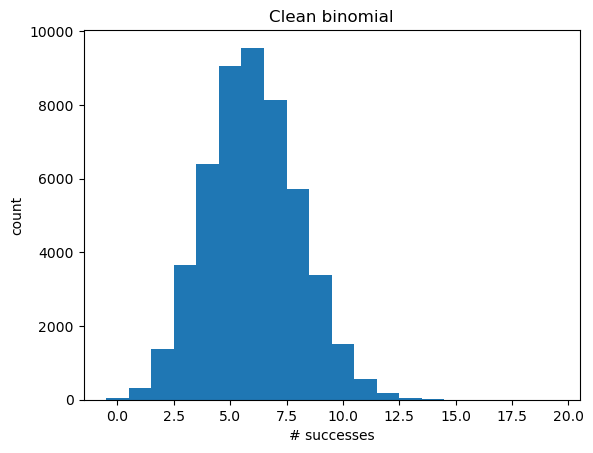

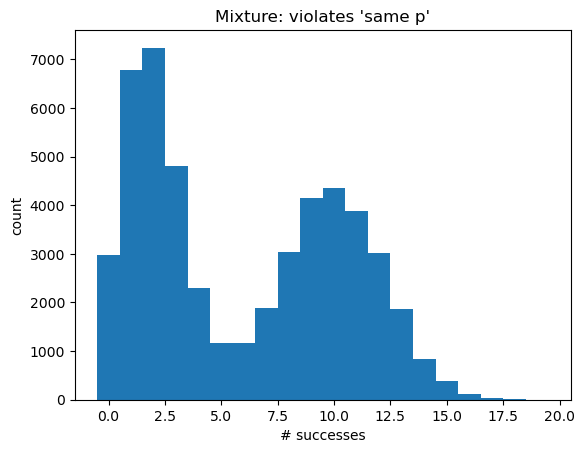


Key ideas:
1) The binomial assumes a stable p across trials.
2) Hidden mixtures (different p by group) inflate variance.
3) In production, this often means you should model the groups separately (or add features).

Try:
- Change N to 100. Does the mixture become easier or harder to spot?
- Change p1/p2 to 0.25/0.35 (subtle mixture). What happens?
- Compute quantiles (p90/p95) for both. Which has worse tail risk?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(1)
n_samples = 50_000
N = 20
p = 0.30

clean = rng.binomial(n=N, p=p, size=n_samples)

# Mixture: half p=0.10, half p=0.50 (same average p=0.30)
p1, p2 = 0.10, 0.50
mix_selector = rng.random(n_samples) < 0.5
mixed = np.where(mix_selector,
                 rng.binomial(N, p1, size=n_samples),
                 rng.binomial(N, p2, size=n_samples))

def summarize(x, name):
    x = pd.Series(x)
    print(f"\n{name}:")
    print("  mean:", float(x.mean()))
    print("  std:", float(x.std(ddof=1)))

summarize(clean, "Clean Binomial(N=20, p=0.30)")
summarize(mixed, "Mixture (p=0.10 or p=0.50)")

bins = np.arange(-0.5, N + 0.5, 1)

plt.figure()
plt.hist(clean, bins=bins)
plt.title("Clean binomial")
plt.xlabel("# successes")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(mixed, bins=bins)
plt.title("Mixture: violates 'same p'")
plt.xlabel("# successes")
plt.ylabel("count")
plt.show()

print("\nKey ideas:")
print("1) The binomial assumes a stable p across trials.")
print("2) Hidden mixtures (different p by group) inflate variance.")
print("3) In production, this often means you should model the groups separately (or add features).")

print("\nTry:")
print("- Change N to 100. Does the mixture become easier or harder to spot?")
print("- Change p1/p2 to 0.25/0.35 (subtle mixture). What happens?")
print("- Compute quantiles (p90/p95) for both. Which has worse tail risk?")

## B.3 Poisson: Counts over time/space

Use Poisson for event counts when events occur independently at a roughly constant rate.  

**The story**  
The Poisson distribution models the count of events in a fixed window (per hour, per day, per square mile) when events are rare-ish and independent.  

**Mathematical definition:**  
If $x$ counts events in a fixed window with an average rate $\lambda$, then:
$$P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}, \quad k = 0,1,2,...$$  

Where:
* $\lambda > 0$ is both the mean rate and the expected count
* $k$ is the observed number of events

**Moments:**  
$E[X] = \lambda$  
$Var(X) = \lambda$  

**Diagnostic Identity:** 
In a true Poisson process:  

mean &approx; variance  

If your empirical variance is much larger than the mean, you likely have overdispersion (mixture, bursts, seasonality)  

**Poisson as rare-event binomial:**  
When $N$ is large and $p$ is small, a binomial distribution with $Np = \lambda$ converges to a Poisson$(\lambda)$  

This is why Poisson often models rare events in large populations.  

<table style="text-align:left;">
    <tr>
        <th>Poisson assumption</th>
        <th>What it means</th>
        <th>Common failure mode</th>
    </tr>
    <tr>
        <td>Constant rate ($\lambda$)</td>
        <td>Same expected events per window</td>
        <td>Seasonality, diurnal cycles</td>
    </tr>
    <tr>
        <td>Independent events</td>
        <td>No clustering/bursts</td>
        <td>Incidents trigger more incidents</td>
    </tr>
    <tr>
        <td>Mean &approx variance</td>
        <td>Characteristic Poisson signatre</td>
        <td>Overdispersion(variance > mean)</td>
    </tr>
</table>  

**Overdispersion is the tell**  
In real systems, counts often have **variance > mean** due to hidden mixtures and bursts. If you see that, "pure Poisson" is probably the wrong story

### Microlab: Poisson vs bursty counts (overdispersion)  

Simulate a clean Poisson count and a "bursty" process with the same mean. The bursty process violates independence / constant rate and shows higher variance


Poisson(4):
  mean: 4.00386
  var : 4.005405100400928
  var/mean: 1.0003859027041224

Bursty mixture (same mean):
  mean: 4.00038
  var : 20.061259855602206
  var/mean: 5.014838554237899


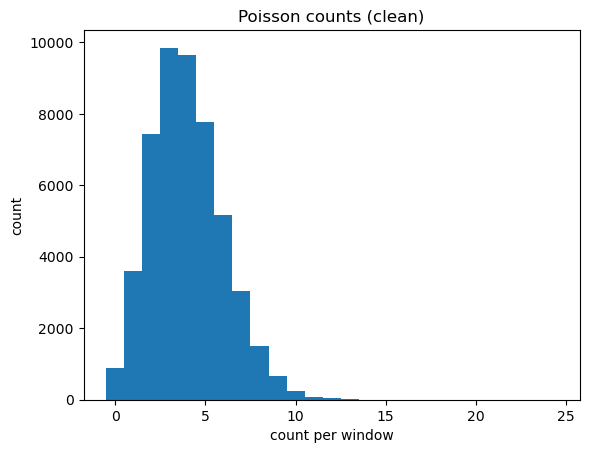

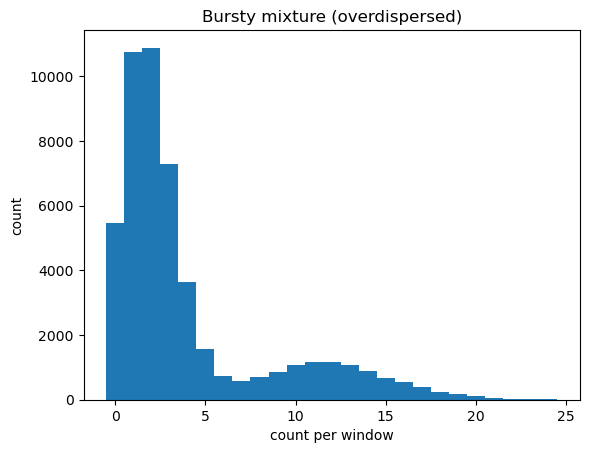


Key ideas:
1) Pure Poisson: mean ≈ variance (signature).
2) Bursts/mixtures inflate variance (overdispersion).
3) Overdispersion is often a hint you should add context (time-of-day, location, group).

Try:
- Change mixture probabilities (0.9/0.1). Does overdispersion shrink?
- Add a weekly cycle: lam=2 on weekdays, lam=6 on weekends.
- Compute counts by subgroup and see if overdispersion disappears when conditioned.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(2)
n = 50_000

# Clean Poisson with mean 4
pois = rng.poisson(lam=4, size=n)

# Bursty mixture: with prob 0.8, lam=2; with prob 0.2, lam=12 (mean still 4)
mix = rng.random(n) < 0.2
bursty = np.where(mix, rng.poisson(12, size=n), rng.poisson(2, size=n))

def summarize(x, name):
    x = pd.Series(x)
    print(f"\n{name}:")
    print("  mean:", float(x.mean()))
    print("  var :", float(x.var(ddof=0)))
    print("  var/mean:", float(x.var(ddof=0) / x.mean()))

summarize(pois, "Poisson(4)")
summarize(bursty, "Bursty mixture (same mean)")

plt.figure()
plt.hist(pois, bins=np.arange(-0.5, 25.5, 1))
plt.title("Poisson counts (clean)")
plt.xlabel("count per window")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(bursty, bins=np.arange(-0.5, 25.5, 1))
plt.title("Bursty mixture (overdispersed)")
plt.xlabel("count per window")
plt.ylabel("count")
plt.show()

print("\nKey ideas:")
print("1) Pure Poisson: mean ≈ variance (signature).")
print("2) Bursts/mixtures inflate variance (overdispersion).")
print("3) Overdispersion is often a hint you should add context (time-of-day, location, group).")

print("\nTry:")
print("- Change mixture probabilities (0.9/0.1). Does overdispersion shrink?")
print("- Add a weekly cycle: lam=2 on weekdays, lam=6 on weekends.")
print("- Compute counts by subgroup and see if overdispersion disappears when conditioned.")

## B.4 Normal: noise, averages, and the CLT intuition

Normality is often a property of **aggregates**, not raw, messy measurements  

**The story**  
The normal distribution appears when you observe the sum or average of many small, weakly-dependent effects. That is why if often fits **measurement noise** and **averages** better than it fits raw outcomes  

**Mathematical definition:**  
A continuous random variable $x$ is normally distributed with means $\mu$ and variance $\sigma^2$ if its probability density fucntion is:  
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
Where:  
* $\mu$ = center (mean)
* $\sigma^2$ = variance
* Support: $(-\infty, \infty)$

**Moments:**  
$E[x] = \mu$  
$Var(X) = \sigma^2$  

### Standard normal  

If $Z = (X - \mu) / \sigma$, then  
$Z \sim \text{Normal}(0, 1)$  

Standardization is the mathematical backbone of:
* Z-scores
* Confidence intervals
* Many classical hypothesis tests

**Tail risk warning:**  
The normal distribution decays exponentially in the tails. Heavy-tailed real-world processes decay much more slowly. If your data is heavy-tailed, a normal model systematically underestimates the extreme risk.  

<table style="text-align:left;">
    <tr>
        <th>Where normal often works</th>
        <th>Where it often fails</th>
    </tr>
    <tr>
        <td>Sensor error, residuals, averages over many items</td>
        <td>Counts, bounded variables, heavy-tailed durations</td>
    </tr>
    <tr>
        <td>Approximation for binomial (large N, p not extreme)</td>
        <td>Rare events and extreme class imbalance</td>
    </tr>
    <tr>
        <td>CLT-ish behavior for aggregated metrics</td>
        <td>Mixtures / regime changes (two normals $\neq$ normal)</td>
    </tr>
</table>

**Normality $\neq$ the world is normal**  
If the outcome is heavy-tailed (like service times), the normal distribution can massively understate tail risk. That is a real decision hazard.

### Microlab: CLT intuition by averaging non-normal noise  

Start with a clearly non-normal distribution (exponential), then average samples. The average becomes more normal-looking as you increase sample size.  

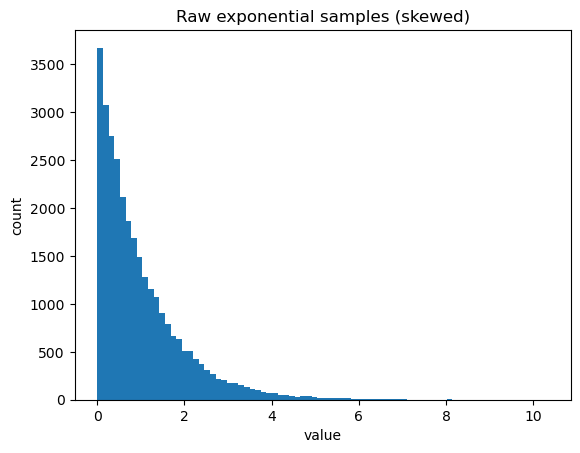

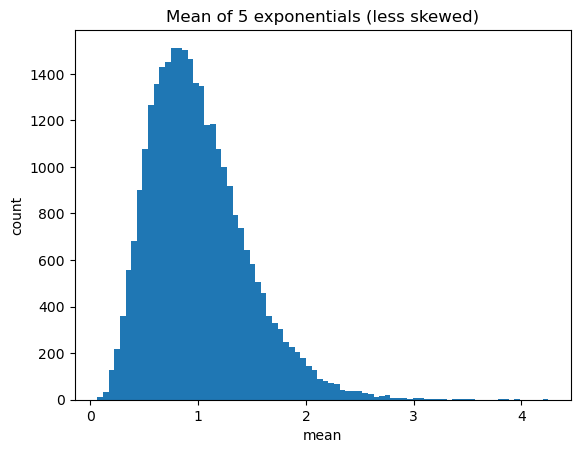

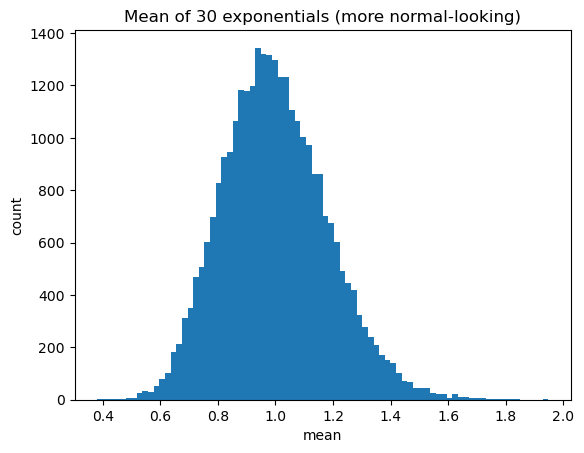


Key ideas:
1) Raw data can be very non-normal (skewed, heavy-tailed).
2) Averages of many samples often look more normal (CLT intuition).
3) This is why normal models are often used for aggregated metrics or residuals, not raw counts/durations.

Try:
- Replace exponential with a mixture distribution (half exp(scale=1), half exp(scale=5)).
- Increase k to 100. Does it keep getting more symmetric?
- Compare the tail behavior: do means still hide rare extreme outcomes?


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(3)
n_trials = 30_000

# Raw distribution: exponential (right-skewed)
raw = rng.exponential(scale=1.0, size=n_trials)

def sample_means(k):
    # average of k exponentials
    samples = rng.exponential(scale=1.0, size=(n_trials, k))
    return samples.mean(axis=1)

m1 = raw
m5 = sample_means(5)
m30 = sample_means(30)

plt.figure()
plt.hist(m1, bins=80)
plt.title("Raw exponential samples (skewed)")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(m5, bins=80)
plt.title("Mean of 5 exponentials (less skewed)")
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(m30, bins=80)
plt.title("Mean of 30 exponentials (more normal-looking)")
plt.xlabel("mean")
plt.ylabel("count")
plt.show()

print("\nKey ideas:")
print("1) Raw data can be very non-normal (skewed, heavy-tailed).")
print("2) Averages of many samples often look more normal (CLT intuition).")
print("3) This is why normal models are often used for aggregated metrics or residuals, not raw counts/durations.")

print("\nTry:")
print("- Replace exponential with a mixture distribution (half exp(scale=1), half exp(scale=5)).")
print("- Increase k to 100. Does it keep getting more symmetric?")
print("- Compare the tail behavior: do means still hide rare extreme outcomes?")

## B.5 - Lab exercise

# C. Estimation and Inference  

Inference is how we make disciplined claims from finite data. You will learn:  
* Quantify uncertainty - confidence intervals
* Make structured decisions - hypothesis tests
* Compare many groups - ANOVA

## C.1 The inference game: population vs sample

Parameters belong to populations. Estimates come from samples  

<table style="text-align:left;">
    <caption style="text-align:left; font-weight:bold;">Three objects that must be kept separate</caption>
    <tr>
        <th>Object</th>
        <th>Example</th>
        <th>What it is</th>
    </tr>
    <tr>
        <td>Population parameter</td>
        <td>$\mu, p, \sigma^2$</td>
        <td>Fixed, unknown truth about the full population</td>
    </tr>
    <tr>
        <td>Sample statistic</td>
        <td>$\bar{X}$, $\hat{p}$, $s^2$</td>
        <td>Computed from observed sample</td>
    </tr>
    <tr>
        <td>Sampling distribution</td>
        <td>Distribution of $\bar{X}$ across repeated samples</td>
        <td>How the statistic varies if you re-ran reality</td>
    </tr>
</table>  

**Why it matters in ML**  
In ML, you constantly estimate things: average loss, accuracy, error rates, calibration gaps, latency, conversion, churn, etc. Without uncertainty, you do not know whether a change is real or noise.  

**Core Idea:**  
Inference is about the distribution of your estimate - not just the estimate

## C.2 Confidence intervals (and what they really mean)  

Estimation with uncertainty, not "magic certainty bands"  

### Mean: CLT intuition  
Under mild conditions, the sampling distribution of the mean is approximately normal:  
$$\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$
In practice, $\sigma$ is unknown, so we use the sample standard deviation $s$. For large $n$, a common 95% CI for $u$ is: 
$$\bar{X} \pm 1.96 \cdot \frac{s}{\sqrt{n}}$$  

**Why 1.96?**  
For a standard normal $Z \sim \mathcal{N}(0,1):P(|X|\leq1.96)\approx0.95$

### Proportion: CI for a rate  
Many ML metrics are proportions: accuracy, precision, click-through rate. If $\hat{p}$ is the sample proportion, a common large-sample CI is:  
$$\hat{p} \pm 1.96 \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$  

**Small n / extreme p**  
For small samples or very rare events, naive proportion CIs can behave badly. This is one reason resampling methods (next section) are so popular in practice.  

### What a 95% CI does (and does not) mean  
<table style="text-align:left;">
    <tr>
        <th>Correct framing</th>
        <th>Common wrong framing</th>
    </tr>
    <tr>
        <td>If we repeated sampling many times, 95% of constructed intervals would contain $\mu$</td>
        <td>There is a 95% probability that $\mu$ lies in this specific interval</td>
    </tr>
    <tr>
        <td>The parameter is fixed; the interval is random</td>
        <td>The interval is fixed; the parameter is random</td>
    </tr>
</table>

### Microlab: CI coverage intuition  
Simulate many samples and check how often the CI contains the true mean.  

In [1]:
import numpy as np

rng = np.random.default_rng()

true_mu = 10
true_sigma = 3
n = 50
trials = 4000

covers = 0
for _ in range(trials):
    x = rng.normal(true_mu, true_sigma, size=n)
    xbar = x.mean()
    s = x.std(ddof=1)
    lo = xbar - 1.96 * s / np.sqrt(n)
    hi = xbar + 1.96 * s / np.sqrt(n)
    covers += int(lo <= true_mu <= hi)

print("Empirical coverage:", covers / trials)
print("(Should be near 0.95 if assumptions roughly hold.)")

print("\nKey ideas:")
print("1) A 95% CI captures the true mean about 95% of the time *across repeated samples*.")
print("2) The parameter is fixed; the interval is random.")
print("3) Coverage depends on assumptions (normality / sample size).")

print("\nTry:")
print("- Reduce n to 10. Does empirical coverage stay near 0.95?")
print("- Increase n to 200. What happens to CI width?")
print("- Replace normal data with exponential data. Does coverage change?")

Empirical coverage: 0.943
(Should be near 0.95 if assumptions roughly hold.)

Key ideas:
1) A 95% CI captures the true mean about 95% of the time *across repeated samples*.
2) The parameter is fixed; the interval is random.
3) Coverage depends on assumptions (normality / sample size).

Try:
- Reduce n to 10. Does empirical coverage stay near 0.95?
- Increase n to 200. What happens to CI width?
- Replace normal data with exponential data. Does coverage change?


### Microlab: CI width vs sample size  
Compute average CI width for different n

In [2]:
import numpy as np

rng = np.random.default_rng()

true_mu = 0
true_sigma = 1
trials = 2000

def avg_width(n):
    widths = []
    for _ in range(trials):
        x = rng.normal(true_mu, true_sigma, size=n)
        xbar = x.mean()
        s = x.std(ddof=1)
        lo = xbar - 1.96 * s / np.sqrt(n)
        hi = xbar + 1.96 * s / np.sqrt(n)
        widths.append(hi - lo)
    return float(np.mean(widths))

for n in [10, 25, 50, 100, 400]:
    w = avg_width(n)
    print(f"n={n:4d}  avg CI width={w:.3f}  width*sqrt(n)={w*np.sqrt(n):.3f}")
    
print("\nKey ideas:")
print("1) CI width shrinks roughly like 1/sqrt(n).")
print("2) Halving uncertainty requires ~4x more data.")
print("3) Sample size planning is a resource decision, not just math.")

print("\nTry:")
print("- Double n again (e.g., 800). Does width*sqrt(n) stay roughly constant?")
print("- Increase true_sigma. How does variability affect width?")
print("- Compare two scenarios: small effect vs high variance.")

n=  10  avg CI width=1.204  width*sqrt(n)=3.807
n=  25  avg CI width=0.781  width*sqrt(n)=3.904
n=  50  avg CI width=0.552  width*sqrt(n)=3.900
n= 100  avg CI width=0.391  width*sqrt(n)=3.912
n= 400  avg CI width=0.196  width*sqrt(n)=3.918

Key ideas:
1) CI width shrinks roughly like 1/sqrt(n).
2) Halving uncertainty requires ~4x more data.
3) Sample size planning is a resource decision, not just math.

Try:
- Double n again (e.g., 800). Does width*sqrt(n) stay roughly constant?
- Increase true_sigma. How does variability affect width?
- Compare two scenarios: small effect vs high variance.


## C.3 Hypothesis testing

A structured way to decide if a signal is plausibly real  

### Null and alternative  
A hypothesis test begins by translating a vague question ("Is this different?") into a precise mathematical claim.  
**Null hypothesis**: represents a baseline or status-quo assumption. For a population mean, this is:  
$$H_0: \mu = \mu_0$$

This says:  
The true population mean equals some reference value $\mu_0$. The reference might be:
* a historical average
* a theoretical benchmark
* the mean of another group

**Alternative hypothesis:** represents evidence of change:  
$$H_1: \mu \neq \mu_0$$

This does not assert how large the difference is, only that the true mean differs from the reference.  

### From difference to standardized difference  
If we collect data and compute the sample mean $\bar{X}$, the natural first question is:  
*How far is $\bar{X}$ from $\mu_0$?*  
The raw difference is:
$$\bar{X} - \mu_0$$  
But this difference alone is not enough. A difference of 2 units may be large or small depending on the variability of the data.  
To account for uncertainty, we scale the difference by its **standard error**  
$$\frac{s}{\sqrt{n}}$$
This measures how much the sample mean typically fluctuates due to sampling variability.  

### The test statistic  
Dividing the difference by its standard error gives a **standardized statistic**  
$$T = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}$$  
This answers the question:  
*How many standard errors away from the null value is our estimate?*  

**Intuition**  
Large values of $T$ mean the observed mean is far from what the null predicts. Small values of $T$ mean the difference is consistent with ordinary sampling noise.  

### The t-test  
When we use this statistic to test a population mean, the procedure is called a **one-sample t-test**.  
It is called a t-test because, when the population variance is unknown, the standardized statistic follows a **t-distribution** rather than a normal distribution

### Microlab: Where the t-test distribution comes from.  

If we repeatedly sample from a normal population and compute the **standardized statistic** we can see the t-distribution emerge empirically

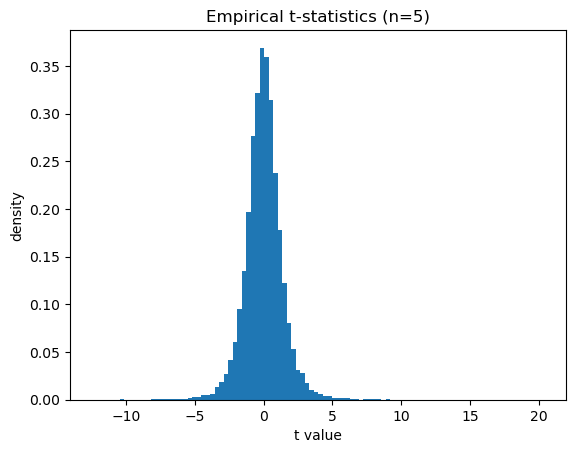


Mean of simulated T: 0.0024578505475552972
Std of simulated T: 1.3959767015406452

Key ideas:
1) When variance is estimated from data, the statistic is more variable.
2) For small n, the distribution has heavier tails than a normal.
3) As n increases, the distribution approaches standard normal.

Try:
- Increase n to 30. Does the histogram look more normal?
- Increase n to 100. What changes?
- Compare with z = (xbar - mu)/(sigma/sqrt(n)) using known sigma.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64
import math

rng = np.random.default_rng(0)

true_mu = 0
true_sigma = 1
n = 5          # small sample size
trials = 20000

t_values = []

for _ in range(trials):
    x = rng.normal(true_mu, true_sigma, size=n)
    xbar = x.mean()
    s = x.std(ddof=1)
    t = (xbar - true_mu) / (s / np.sqrt(n))
    t_values.append(t)

t_values = np.array(t_values)

plt.figure()
plt.hist(t_values, bins=100, density=True)
plt.title(f"Empirical t-statistics (n={n})")
plt.xlabel("t value")
plt.ylabel("density")
plt.show()

print("\nMean of simulated T:", float(t_values.mean()))
print("Std of simulated T:", float(t_values.std()))

print("\nKey ideas:")
print("1) When variance is estimated from data, the statistic is more variable.")
print("2) For small n, the distribution has heavier tails than a normal.")
print("3) As n increases, the distribution approaches standard normal.")

print("\nTry:")
print("- Increase n to 30. Does the histogram look more normal?")
print("- Increase n to 100. What changes?")
print("- Compare with z = (xbar - mu)/(sigma/sqrt(n)) using known sigma.")

### Degrees of freedom  
The t-distribution depends on the sample size through its degrees of freedom:
$$df=n-1$$
As $n$ increases, the t-distribution approaches the normal distribution. For large samples, the distinction becomes negligible.  

**Practical Takeaway:**  
In most ML applications with large datasets, t-tests and z-tests give nearly identical results. With small samples, the t-test is more conservative.  

### The importance of p-values  

The p-value is:
$$p = P((|T| \geq |t_{obs}|)| H_0)$$
In words:
* It is the probability of observing a statistic at least as extreme as yours, **assuming the null hypothesis is true**
* It is **not** the probability that the null hypothesis is true

**Common misunderstanding:**  
A small p-value does not mean the null is "unlikely". It means your observed data would be unusual if the null were correct.  

### Decision rule and $\alpha$  
Before you look at data, you choose a significance level $\alpha$. After you compute a p-value, you apply the rule:  
**if $p \leq \alpha$, reject $H_0$; otherwise, fail to reject $H_0$**  

Interpreting $\alpha$:  
It is the long-run false positive rate (Type I error rate).  
$$P(\text{reject }H_0 | H_0 \text{ true}) = \alpha$$

### Type I and Type II errors  
<table style="text-align:left;">
    <tr>
        <th>Reality</th>
        <th>Reject $H_0$</th>
        <th>Fail to Reject $H_0$</th>
    </tr>
    <tr>
        <td>$H_0$ is true</td>
        <td>Type I error (false positive), probability $\alpha$</td>
        <td>Correct decision</td>
    </tr>
    <tr>
        <td>$H_0$ is false</td>
        <td>Correct decision</td>
        <td>Type II error (false negative), probability $\beta$</td>
    </tr>
</table>

Lowering $\alpha$ reduces false positives, but (all else equal) increases false negatives (higher $\beta$).

### Power  
Power is the probability you detect a real effect: power is the chance you reject $H_0$ when $H_0$ is false.  
Since $\beta$ is the Type II error rate, power is:  
$$\text{power}=1-\beta$$

### What drives power  
<table style="text-align:left;">
    <tr>
        <th>Driver</th>
        <th>Effect on power</th>
    </tr>
    <tr>
        <td>Sample size $n$</td>
        <td>Larger $n$ increases power</td>
    </tr>
    <tr>
        <td>Effect size $|\mu-\mu_0|$</td>
        <td>Larger differences increase power</td>
    </tr>
    <tr>
        <td>Variance $\sigma^2$</td>
        <td>Higher variance reduces power</td>
    </tr>
</table>

A useful intuition is "signal-to-noise": bigger effect(signal), larger(sample), and lower variance(noise) all increase detectability.  
$$\text{signal-to-noise} = \frac{|\mu-\mu_0|}{\sigma/\sqrt{n}}$$  
This ratio is proportional to the expected test statistic under the alternative hypothesis. As it increases, the sampling distribution shifts farther into the rejection region, so power rises.  

**ML Translation:**  
In A/B testing:  
* Effect size = improvement in metric
* Variance = metric variablity
* Sample size = traffic volume

Power analysis is resource allocation planning  

### Failure modes in real data  
* Heavy tails inflate variance &rarr; reduce power
* Mixture distributions hide subgroup effects
* Non-independence breaks Type I error guarantees
* Multiple testing inflates false positives

**Inference discipline:**  
Hypothesis testing is a decision rule under assumptions. When assumptions fail, the error guarantees fail.  

### Microlab: p-values shrink with n (even for tiny effects)

In [2]:
import numpy as np

rng = np.random.default_rng()

mu0 = 10.0
mu_true = 10.2   # small effect
sigma = 3.0

def approx_pvalue_z(sample, mu0):
    # Normal approximation for teaching; we’ll do more rigorous testing in the notebook.
    n = len(sample)
    xbar = float(np.mean(sample))
    s = float(np.std(sample, ddof=1))
    z = (xbar - mu0) / (s / np.sqrt(n))
    # two-sided p-value via normal CDF approximation
    # We'll use a simple approximation via erf to avoid external libs in micro-labs.
    import math
    def phi(z):
        return 0.5 * (1 + math.erf(z / math.sqrt(2)))
    p = 2 * (1 - phi(abs(z)))
    return z, p

for n in [20, 200, 2000]:
    x = rng.normal(mu_true, sigma, size=n)
    z, p = approx_pvalue_z(x, mu0)
    print(f"n={n:4d}  z={z:7.3f}  approx p={p:.6f}")
    
print("\nKey ideas:")
print("1) Small p-values can come from large samples, not large effects.")
print("2) Statistical significance is not the same as practical importance.")
print("3) Effect size must be interpreted alongside p-values.")

print("\nTry:")
print("- Reduce the true effect (e.g., mu_true = 10.05). What happens to p?")
print("- Increase variance (sigma = 6). How does that change detection?")
print("- Fix n=200 and run multiple simulations. How stable are results?")

n=  20  z= -0.534  approx p=0.593641
n= 200  z=  0.077  approx p=0.938856
n=2000  z=  2.520  approx p=0.011722

Key ideas:
1) Small p-values can come from large samples, not large effects.
2) Statistical significance is not the same as practical importance.
3) Effect size must be interpreted alongside p-values.

Try:
- Reduce the true effect (e.g., mu_true = 10.05). What happens to p?
- Increase variance (sigma = 6). How does that change detection?
- Fix n=200 and run multiple simulations. How stable are results?


## C.4 Effect sizes (practical significance)  


"Is it real?" is not the same as "does it matter?"  

### Confidence intervals already encode a decision  

A useful mental model:  
Hypothesis tests and confidence intervals are closely related. For a two-sided test at level $\alpha = 0.05$: you reject $H_0$ if 95% CI excludes the null value  

### Effect size examples
<table style="text-align:left:">
    <tr>
        <th>Quantity</th>
        <th>Effect size</th>
        <th>Interpretation</th>
    </tr>
    <tr>
        <td>Mean difference</td>
        <td>$\Delta = \bar{X}_A - \bar{X}_B$</td>
        <td>Absolute change (units matter)</td>
    </tr>
    <tr>
        <td>Standardized mean diff (Cohen's d)</td>
        <td>$d = \Delta/s_{pooled}$</td>
        <td>Scale-free magnitude</td>
    </tr>
    <tr>
        <td>Proportion difference</td>
        <td>$\Delta = \hat{p}_A - \hat{p}_B$</td>
        <td>Absolute change in rate</td>
    </tr>
    <tr>
        <td>Relative change</td>
        <td>$\Delta/\hat{p}_B$</td>
        <td>Multiplicative framing</td>
    </tr>
</table>

**Practical threshold:**  
Before you look at p-values, define a minimum effect size you care about. Otherwise you will "discover" tiny, irrelevant truths.

### Microlab: Same-p value, different effect sizes  

In [3]:
import numpy as np

rng = np.random.default_rng()

x = rng.normal(100, 15, size=200)  # baseline
y = x + rng.normal(2.0, 15, size=200)  # small shift

def cohens_d(a, b):
    a = np.asarray(a); b = np.asarray(b)
    sa = a.std(ddof=1); sb = b.std(ddof=1)
    sp = np.sqrt(((len(a)-1)*sa**2 + (len(b)-1)*sb**2) / (len(a)+len(b)-2))
    return (a.mean() - b.mean()) / sp

delta = y.mean() - x.mean()
d = cohens_d(y, x)

print("Mean shift (units):", float(delta))
print("Cohen's d:", float(d))

# Rescale units (e.g., minutes -> seconds)
x2 = x * 60
y2 = y * 60
delta2 = y2.mean() - x2.mean()
d2 = cohens_d(y2, x2)

print("\nAfter rescaling by 60:")
print("Mean shift (units):", float(delta2))
print("Cohen's d:", float(d2))

print("\nKey ideas:")
print("1) Absolute effect sizes depend on units; standardized ones do not.")
print("2) Cohen's d measures magnitude relative to variability.")
print("3) Operational decisions should be based on practical thresholds.")

print("\nTry:")
print("- Increase the shift from 2.0 to 5.0. How does d change?")
print("- Increase the variance instead of the mean shift.")
print("- Compare two small shifts with very different sample sizes.")


Mean shift (units): 1.467823170128412
Cohen's d: 0.07884874961748711

After rescaling by 60:
Mean shift (units): 88.0693902077046
Cohen's d: 0.078848749617487

Key ideas:
1) Absolute effect sizes depend on units; standardized ones do not.
2) Cohen's d measures magnitude relative to variability.
3) Operational decisions should be based on practical thresholds.

Try:
- Increase the shift from 2.0 to 5.0. How does d change?
- Increase the variance instead of the mean shift.
- Compare two small shifts with very different sample sizes.


## C.5 ANOVA  

Comparing many group means without doing separate t-tests  

### Why ANOVA exists  
If you compare many groups pairwise, your chance of at least one false positive grows quickly. ANOVA asks a single question:  
*Is there evidence that at least one group mean differs?*  

**Hypotheses**  
Suppose we have $k$ groups. Let $\mu_i$ denote the **population mean** of group $i$, where $i = 1, ..., k$.  
The null hypothesis states that all group means are equal:  
$$H_0: \mu_1 = \mu_2 =...= \mu_k$$  
The alternative hypothesis states that at least two groups differ:  
$$H_1: \exists r \neq s : \mu_r \neq \mu_s$$  

**Interpretation**
$H_0$ says all groups share a common population mean. $H_1$ says that at least one pair of groups means differs. ANOVA does not specify which groups differ, only that not all means are equal.  

### Variance decomposition (what SS actually measures)  
In one-way ANOVA we have **k groups**. Let $x_{ij}$ be observation $j$ in group $i$, with group mean $\bar{x}_i$ and overall mean $\bar{x}$.  

The total variation in the data is measured by the **total sum of squares**:  
$$SS_{total} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{i,j}-\bar{x})^2$$  
ANOVA splits this total variation into two parts:  
* **Between-group variation:** how far each group mean is from the overall mean
* **Within-group variation:** How spread out observations are inside each group

**Between-group sum of squares:**  
$$SS_{between} = \sum_{i=1}^{k}n_i(\bar{x}_i - \bar{x})^2$$  

**Within-group sum of squares:**  
$$SS_{within} = \sum_{i=1}^{k} \sum_{j=1}^{n_i}(x_{i,j}-\bar{x})^2$$  

**Key identity:**  
$$SS_{total} = SS_{between} + SS_{within}$$

**Intuition:**  
If group means are truly different, then the group means $\bar{x}_i$ separate from the overall mean $\bar{x}$, making $SS_{between}$ large. If differences are just noise, most variation stays inside groups, making $SS_{within}$ dominate.  

### Mean squares (turning SS into variance estimates)  
Raw sums of squares scale with sample size, so we divide by degrees of freedom to get **mean squares:**  

$$MS_{between} = \frac{SS_{between}}{k-1} \quad MS_{within} = \frac{SS_{within}}{n-k}$$  
Here $k$ is the number of groups and $n$ is the total number of observations.  

### F statistic (a variance ratio)
The ANOVA test statistic compares estimated variance between groups to estimated variance within groups:  
$$F = \frac{MS_{between}}{MS_{within}}$$  

Under $H_0$ (all group means equal), both mean squares estimate the underlying variance, so $F$ tends to be near 1. When group means differ, $MS_{between}$ increases and $F$ grows larger.  

**ANOVA assumptions (know the failure mode):**  
Classical ANOVA assumes roughly:  
* independent observations
* similar variance across groups (homoscedasticity)
* errors that are not wildly non-normal

In production data, violations are common. Which is why resampling and robust alternatives matter.  

### Microlab: ANOVA intuition (equal means vs one shifted mean)  
Compare F-statistics when means are equal vs when one group shifts  

In [4]:
import numpy as np

rng = np.random.default_rng()

def anova_F(groups):
    # minimal ANOVA calculation without external libs
    all_vals = np.concatenate(groups)
    grand_mean = all_vals.mean()

    ss_between = 0.0
    ss_within = 0.0
    k = len(groups)
    n_total = len(all_vals)

    for g in groups:
        n = len(g)
        m = g.mean()
        ss_between += n * (m - grand_mean)**2
        ss_within += ((g - m)**2).sum()

    df_between = k - 1
    df_within = n_total - k

    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    F = ms_between / ms_within
    return float(F), float(ms_between), float(ms_within)

g1 = rng.normal(10, 2, 120)
g2 = rng.normal(10, 2, 120)
g3 = rng.normal(10, 2, 120)

F1, msb1, msw1 = anova_F([g1,g2,g3])
print("Equal means: F =", F1)

g3_shift = rng.normal(12, 2, 120)
F2, msb2, msw2 = anova_F([g1,g2,g3_shift])
print("Shift one mean: F =", F2)

print("\nInterpretation: shifting one group's mean tends to increase MS_between relative to MS_within.")

print("\nKey ideas:")
print("1) ANOVA compares between-group variance to within-group variance.")
print("2) A large F suggests at least one group mean differs.")
print("3) ANOVA does NOT tell you which groups differ.")

print("\nTry:")
print("- Increase the shift of one group to 15 instead of 12.")
print("- Make one group much more variable. What happens to F?")
print("- Increase all sample sizes. Does F stabilize?")

Equal means: F = 0.09198255423270751
Shift one mean: F = 36.627876310615775

Interpretation: shifting one group's mean tends to increase MS_between relative to MS_within.

Key ideas:
1) ANOVA compares between-group variance to within-group variance.
2) A large F suggests at least one group mean differs.
3) ANOVA does NOT tell you which groups differ.

Try:
- Increase the shift of one group to 15 instead of 12.
- Make one group much more variable. What happens to F?
- Increase all sample sizes. Does F stabilize?


## C.6 NYC311 Lab

# D. Resampling and Simulation

Classical inference often relies on algebra and assumptions. Resampling replaces most of that with computation. Instead of deriving a sampling distribution, you approximate it by simulating "what could have happened".  

This section teaches three tools that show up in modern data work:  
* **bootstrap**: uncertainty of estimates
* **permutation tests:** null distributions
* **Monte Carlo:** probability by simulation

 **Production realism**  
 Real data is messy, heavy-tailed, and rarely textbook-normal. Resampling methods often remain useful when classical assumptions are strained.  

 

## D.1 - Why Resampling?  

Replace "derive the distribution" with "simulate the distribution"  

### What we want
Compute a statistic from the data: a mean, a median, an AUC, a p95 latency, an uplift... The question is never just "what is the value?" it is **how stable is it?**  

<table style="text-align:left;">
    <tr>
        <th>Goal</th>
        <th>Classical approach</th>
        <th>Resampling approach</th>
    </tr>
    <tr>
        <td>Uncertainty of an estimate</td>
        <td>Closed-form SE+CI</td>
        <td>Bootstrap distribution</td>
    </tr>
    <tr>
        <td>Null distribution for a test</td>
        <td>Assume $t / F / x^2$</td>
        <td>Shuffle labels (permutation)</td>
    </tr>
    <tr>
        <td>Probability of a complex event</td>
        <td>Hard integral</td>
        <td>Monte Carlo simulation</td>
    </tr>
</table>

**The mental model**  
A statistic is a function of data: $T = f(X)$. We want to understand how $T$ varies when data varies.  

Instead of asking: What is the distribution of $T$?  

We simulate: generate many plausible datasets and compute $T$ each time.  

**Unifying theme:**  
Resampling is empirical probability. You approximate uncertainty by frequency in a simulated world.  

## D.2 - Bootstrap

Estimate uncertainty of an estimator without fragile formulas.  

**Earlier Usage:**  
In Module 3.E, you used the bootstrap to build an interval for the median, especially useful when tails are ugly and normal assumptions break.  

In this module we revisit bootstrap more formally: not just as a trick for medians, but as a general method for approximating sampling distributions.  

### What bootstrap assumes  
The bootstrap treats the observed dataset as an empirical approximation to the population. If the sample is representative, resampling from it mimics "repeating the study".  

**Bootstrap recipe:**  
1. Sample $n$ rows with replacement from the dataset
2. Compute the statistic $T^*$ on that resample
3. Repeat many times to get a distribution of $T^*$
4. Use percentiles of $T^*$ as a confidence interval.
$$T^* = f(x_1^*,...,x_n^*)$$

**Bootstrap failure modes**  
If the sample is biased or non-representative, the bootstrap faithfully reproduces that bias. Also, naive bootstrap can struggle with strong dependence (time series) and certain boundary problems.  

### Microlab: Bootstrap CI (heavy-tailed data)  
Bootstrap a mean from an exponential distribution (skewed, heavy-tailed) and build an empirical 95% CI. This is exactly the kind of setting where normal-theory CIs can be misleading

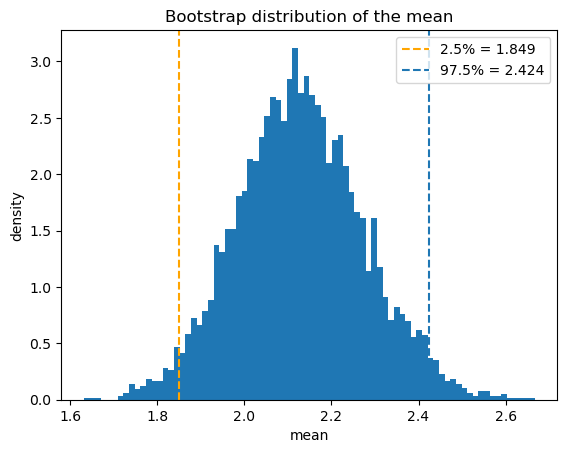

Sample mean: 2.130310346124707
Bootstrap 95% CI: 1.8493241224787824 2.423777389347228

Key ideas:
1) Bootstrap estimates uncertainty by resampling the observed data.
2) No normality assumption is required to *build* the CI.
3) CI quality depends on how representative your sample is.

Try:
- Increase sample size to 200; what happens to CI width?
- Bootstrap the median instead of the mean; compare stability.
- Add a few extreme outliers and re-run; which statistic suffers most?


In [2]:
# Estimate a CI without assuming normality

import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

# Skewed/heavy-tailed-ish sample
x = rng.exponential(scale=2.0, size=200)

B = 5000
boot_means = []
for _ in range(B):
    xb = rng.choice(x, size=len(x), replace=True)
    boot_means.append(xb.mean())

boot_means = np.array(boot_means)
lo, hi = np.percentile(boot_means, [2.5, 97.5])

plt.figure()
plt.hist(boot_means, bins=80, density=True)
plt.axvline(lo, linestyle="--", color="orange", label=f"2.5% = {lo:.3f}")
plt.axvline(hi, linestyle="--", label=f"97.5% = {hi:.3f}")
plt.title("Bootstrap distribution of the mean")
plt.xlabel("mean")
plt.ylabel("density")
plt.legend()
plt.show()

print("Sample mean:", float(x.mean()))
print("Bootstrap 95% CI:", float(lo), float(hi))

print("\nKey ideas:")
print("1) Bootstrap estimates uncertainty by resampling the observed data.")
print("2) No normality assumption is required to *build* the CI.")
print("3) CI quality depends on how representative your sample is.")

print("\nTry:")
print("- Increase sample size to 200; what happens to CI width?")
print("- Bootstrap the median instead of the mean; compare stability.")
print("- Add a few extreme outliers and re-run; which statistic suffers most?")

## D.3 - Permutation Tests  


Build a null distribution by shuffling labels.  

**Core idea:**  
A permutation test answers: **if the null hypothesis were true, how extreme would my observed difference look?**  

Under $H_0$, group labels do not matter, the data is exchangeable with respect to the labels. So we can shuffle lables and recompute the statistic to generate a null distribution.  

### Permutation recipe  
1. Compute observe statistic $T_{obs}$ (e.g., mean difference)
2. Shuffle labels and recompute $T$
3. Repeat many times to get the null distribution
4. p-value = fraction of shuffled statistics at least as extreme as observed.

$$p \approx \frac{\#|T| \geq |T_{obs}|}{B}$$  

**What does the $\#$ mean?**  
The symbol $\#$ means "number of". for example, $\#|T| \geq |T_{obs}|$ means the number of simulated statistics at least as extreme as the observed value. Dividing by $B$ (the total number of simulations) converts a count into an empirical probability.  

**What is the real assumption?**  
Exchangeability under $H_0$. If the group differs in structure beyond the effect that is being tested (e.g., different time periods, different sampling pipelines), the permutation p-value can lie.  

### Microlab: Permutation test for a difference in means  
Create two groups, compute an observed mean difference, then shuffle labels to estimate a p-value empirically.

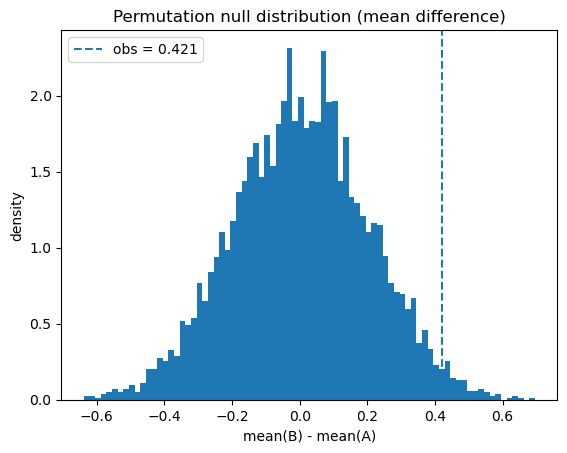

Observed mean difference: 0.4214057207309098
Permutation p-value: 0.0346

Key ideas:
1) Permutation constructs the null distribution directly from the data.
2) Validity depends on exchangeability under H0.
3) It tests the *label association*, not a causal story.

Try:
- Reduce sample size to 15 per group. What happens to p-values?
- Increase the mean shift to 1.0. How quickly does p drop?
- Replace mean difference with median difference; compare sensitivity to outliers.


In [3]:
# Estimate p-value by shuffling labels

import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

A = rng.normal(0.0, 1.0, size=50)
B = rng.normal(0.5, 1.0, size=50)

obs = B.mean() - A.mean()

combined = np.concatenate([A, B])
nA = len(A)

B_reps = 5000
perm = []

for _ in range(B_reps):
    rng.shuffle(combined)
    A_p = combined[:nA]
    B_p = combined[nA:]
    perm.append(B_p.mean() - A_p.mean())

perm = np.array(perm)
p = np.mean(np.abs(perm) >= abs(obs))

plt.figure()
plt.hist(perm, bins=80, density=True)
plt.axvline(obs, linestyle="--", label=f"obs = {obs:.3f}")
plt.title("Permutation null distribution (mean difference)")
plt.xlabel("mean(B) - mean(A)")
plt.ylabel("density")
plt.legend()
plt.show()

print("Observed mean difference:", float(obs))
print("Permutation p-value:", float(p))

print("\nKey ideas:")
print("1) Permutation constructs the null distribution directly from the data.")
print("2) Validity depends on exchangeability under H0.")
print("3) It tests the *label association*, not a causal story.")

print("\nTry:")
print("- Reduce sample size to 15 per group. What happens to p-values?")
print("- Increase the mean shift to 1.0. How quickly does p drop?")
print("- Replace mean difference with median difference; compare sensitivity to outliers.")

### Microlab: Permutation test for median differnce  
Means are sensitive to outliers. What happens if the median is used?  

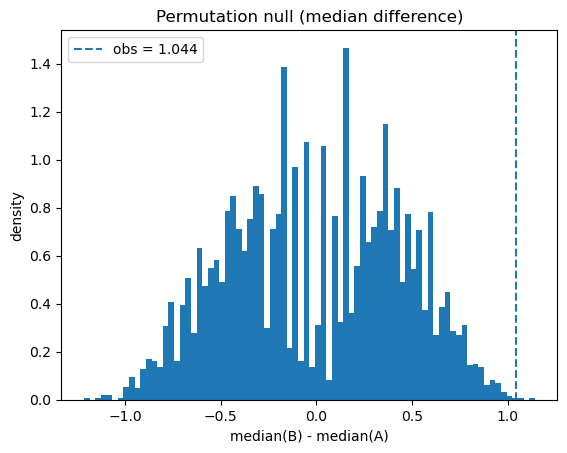

Observed median difference: 1.0438711526153566
Permutation p-value: 0.0022

Key ideas:
1) Permutation works for ANY statistic, not just means.
2) Robust statistics can reduce sensitivity to tails.
3) The null distribution is generated from the data itself.

Try:
- Increase the shift from 0.5 to 1.0.
- Add extreme outliers to one group.
- Compare this p-value to a mean-based permutation test.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

# Skewed data (exponential-like)
A = rng.exponential(scale=2.0, size=40)
B = rng.exponential(scale=2.0, size=40) + 0.5  # shift median slightly

obs = np.median(B) - np.median(A)

combined = np.concatenate([A, B])
nA = len(A)

B_reps = 5000
perm = []

for _ in range(B_reps):
    rng.shuffle(combined)
    A_p = combined[:nA]
    B_p = combined[nA:]
    perm.append(np.median(B_p) - np.median(A_p))

perm = np.array(perm)
p = np.mean(np.abs(perm) >= abs(obs))

plt.figure()
plt.hist(perm, bins=80, density=True)
plt.axvline(obs, linestyle="--", label=f"obs = {obs:.3f}")
plt.title("Permutation null (median difference)")
plt.xlabel("median(B) - median(A)")
plt.ylabel("density")
plt.legend()
plt.show()

print("Observed median difference:", float(obs))
print("Permutation p-value:", float(p))

print("\nKey ideas:")
print("1) Permutation works for ANY statistic, not just means.")
print("2) Robust statistics can reduce sensitivity to tails.")
print("3) The null distribution is generated from the data itself.")

print("\nTry:")
print("- Increase the shift from 0.5 to 1.0.")
print("- Add extreme outliers to one group.")
print("- Compare this p-value to a mean-based permutation test.")

### Microlab: Instability at small sample sizes. 
Repeat the same permutation test experiment many times to see how obs and p-values jump around

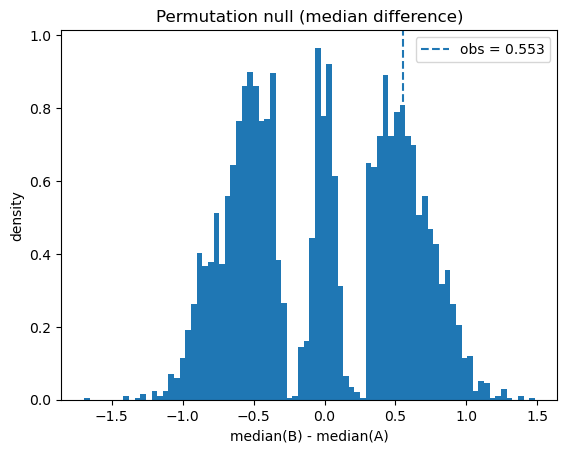

Observed median difference: 0.5527020801725919
Permutation p-value: 0.4384

Key ideas:
1) Permutation works for ANY statistic, not just means.
2) Robust statistics can reduce sensitivity to tails.
3) The null distribution is generated from the data itself.

Try:
- Increase the shift from 0.5 to 1.0.
- Add extreme outliers to one group.
- Compare this p-value to a mean-based permutation test.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

# Skewed data (exponential-like)
A = rng.exponential(scale=2.0, size=40)
B = rng.exponential(scale=2.0, size=40) + 0.5  # shift median slightly

obs = np.median(B) - np.median(A)

combined = np.concatenate([A, B])
nA = len(A)

B_reps = 5000
perm = []

for _ in range(B_reps):
    rng.shuffle(combined)
    A_p = combined[:nA]
    B_p = combined[nA:]
    perm.append(np.median(B_p) - np.median(A_p))

perm = np.array(perm)
p = np.mean(np.abs(perm) >= abs(obs))

plt.figure()
plt.hist(perm, bins=80, density=True)
plt.axvline(obs, linestyle="--", label=f"obs = {obs:.3f}")
plt.title("Permutation null (median difference)")
plt.xlabel("median(B) - median(A)")
plt.ylabel("density")
plt.legend()
plt.show()

print("Observed median difference:", float(obs))
print("Permutation p-value:", float(p))

print("\nKey ideas:")
print("1) Permutation works for ANY statistic, not just means.")
print("2) Robust statistics can reduce sensitivity to tails.")
print("3) The null distribution is generated from the data itself.")

print("\nTry:")
print("- Increase the shift from 0.5 to 1.0.")
print("- Add extreme outliers to one group.")
print("- Compare this p-value to a mean-based permutation test.")

## D.4 - Monte Carlo methods 

Approximate probabilities and expectations by simulation.  

**Monte Carlo in one sentence**  
If you can simulate the process, you can approximate the probability.  

Monte Carlo replaces analytic calculation with repeated random sampling. Instead of solving an integral or deriving a formula, we simulate the system many times and measure what happens.  

### Probability as frequency  
Suppose you want the probability of an event $A$. If you simulate the system $N$ times, and the event occurs in $\#A$ simulations, then:  
$$P(A) \approx \frac{\#A}{N}$$  

As $N$ grows large, this approximation improves. This is an application of the Law of Large Numbers.

**Law of Large Numbers**  
Sample averages converge to true expectations as the number of samples increases. Monte Carlo relies on this convergence.  

### Estimating expectaitons  
Monte Carlo is not limited to probabilities. If $X$ is a random variable, its expectation can be approximated by averaging simulations: 

$$E[X] \approx \frac{1}{N}\sum^N_{i=1}X_i$$  

This works even when:  
* The distribution of $X$ is complicated
* The integral defining $E[X]$ has no closed form
* The system is defined by a simulation (e.g., pipeline, model, environment)

### Monte Carlo error  
Monte Carlo estimates are noisy. The standard error of a Monte Carlo estimate shrinks roughly like:  
$$\text{error} \propto \frac{1}{\sqrt{N}}$$  

This is a slow convergence. To cut error in half, you need about 4X more simulations.  

**Compute tradeoff**  
Monte Carlo is extremely general, but accuracy improves slowly. It trades mathematical derivation for computational cost.  

### Three common Monte Carlo use cases  
<table style="text-align:left;">
    <tr>
        <th>Goal</th>
        <th>Monte Carlo view</th>
    </tr>
    <tr>
        <td>Probability of rare event</td>
        <td>Simulate many trials, count exceedances</td>
    </tr>
    <tr>
        <td>Expected value of complex function</td>
        <td>Average simulated outputs</td>
    </tr>
    <tr>
        <td>Uncertainty propagation</td>
        <td>Push simulated inputs through system</td>
    </tr>
</table>

**Where Monte Carlo shows up in ML**
* Estimating rare-event risk (tail probabilities)
* Uncertainty propagation through pipelines
* Simulation-based calibration checks
* Randomized algorithms and approximation

In many ML systems, the "distribution" exists only implicitly, defined by a simulator, pipeline, or a model. Monte Carlo becomes the natural language of inference. 

### Microlab: Estimate $\pi$ by simulation  
Use a Monte Carlo simulation to estimate $\pi$ by randomly sampling points in a unit square and counting what fraction land inside the unit circle. This fraction should equal $\pi/4$, from which $\pi$ can be estimated.

In [6]:
import numpy as np

rng = np.random.default_rng()

N = 200000
x = rng.uniform(-1, 1, size=N)
y = rng.uniform(-1, 1, size=N)

inside = (x**2 + y**2) <= 1
pi_est = 4 * inside.mean()

print("Monte Carlo estimate of pi:", float(pi_est))
print("Inside fraction:", float(inside.mean()))

print("\nKey ideas:")
print("1) Monte Carlo estimates probability by frequency.")
print("2) Accuracy improves as N grows, but slowly (~1/sqrt(N)).")
print("3) Simulation is general: it works when math is hard.")

print("\nTry:")
print("- Decrease N to 10_000; how unstable is the estimate?")
print("- Increase N to 1_000_000; does it converge tightly?")
print("- Estimate the area of an ellipse by changing the inside condition.")

Monte Carlo estimate of pi: 3.14174
Inside fraction: 0.785435

Key ideas:
1) Monte Carlo estimates probability by frequency.
2) Accuracy improves as N grows, but slowly (~1/sqrt(N)).
3) Simulation is general: it works when math is hard.

Try:
- Decrease N to 10_000; how unstable is the estimate?
- Increase N to 1_000_000; does it converge tightly?
- Estimate the area of an ellipse by changing the inside condition.


### How bootstrap, permutation, and Monte Carlo differ  
All three methods use simulation, but they answer different questions.  

<table style="text-align:left;">
    <tr>
        <th>Method</th>
        <th>Primary goal</th>
        <th>What is simulated?</th>
        <th>Key assumption</th>
    </tr>
    <tr>
        <td>Bootstrap</td>
        <td>Estimate uncertainty of an estimator</td>
        <td>Resample observed data (with replacement)</td>
        <td>Sample approximates population</td>
    </tr>
    <tr>
        <td>Permutation</td>
        <td>Test a null hypothesis</td>
        <td>Shuffle labels under $H_0$</td>
        <td>Exchangeability uner $H_0$</td>
    </tr>
    <tr>
        <td>Monte Carlo</td>
        <td>Approximate probability or expectation</td>
        <td>Simulate from a defined model or process</td>
        <td>Simulator reflects the real system</td>
    </tr>
</table>

**Unifying idea**  
All three approximate a distribution by frequency, but the source of randomness differs  

### What distribution is being approximated?
* **Bootstrap:** sampling distribution of an estimator
* **Permutation:** null distribution of a test statistic
* **Monte Carlo:** probability distribution defined by a model or simulator

## D.5 - NYC311 Lab - in Lab Book

# E - Interpreting Results Responsibly

I have read this section, but not added to this notebook yet.